In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


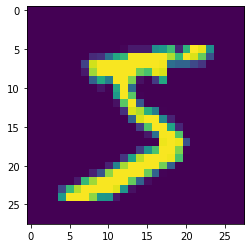

In [8]:
plt.imshow(x_train[0])

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
x_train = x_train/255.0 # .0 is required as other values only 1 and 0 will be stored.
x_test = x_test/255.0

In [13]:
x_train = x_train.reshape(60000,28,28,1) #as CNN expects 3 dimensional input
x_test = x_test.reshape(10000,28,28,1)

In [18]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax'))


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(x_train,y_train,batch_size=128,verbose=1,validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
469/469 [==============================] - 150s 317ms/step - loss: 0.2351 - accuracy: 0.9283 - val_loss: 0.0588 - val_accuracy: 0.9798
Epoch 2/10
469/469 [==============================] - 148s 315ms/step - loss: 0.0854 - accuracy: 0.9747 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 3/10
469/469 [==============================] - 149s 317ms/step - loss: 0.0635 - accuracy: 0.9805 - val_loss: 0.0348 - val_accuracy: 0.9881
Epoch 4/10
469/469 [==============================] - 148s 316ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0364 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 148s 315ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0301 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 147s 314ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0288 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 147s 314ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0307 -

In [22]:
history.history

{'accuracy': [0.9283000230789185,
  0.9746999740600586,
  0.9805333614349365,
  0.9836999773979187,
  0.9857333302497864,
  0.98826664686203,
  0.9892666935920715,
  0.9912333488464355,
  0.9910833239555359,
  0.9915833473205566],
 'loss': [0.23509468138217926,
  0.08537612110376358,
  0.06354936212301254,
  0.05301424488425255,
  0.045958731323480606,
  0.03802487254142761,
  0.03492702916264534,
  0.029314495623111725,
  0.027343008667230606,
  0.025691751390695572],
 'val_accuracy': [0.9797999858856201,
  0.9876999855041504,
  0.988099992275238,
  0.9884999990463257,
  0.9896000027656555,
  0.991100013256073,
  0.9905999898910522,
  0.991100013256073,
  0.9914000034332275,
  0.9918000102043152],
 'val_loss': [0.05877756327390671,
  0.038183316588401794,
  0.03482010215520859,
  0.03641361743211746,
  0.030149979516863823,
  0.028773067519068718,
  0.03068060241639614,
  0.028021356090903282,
  0.030065827071666718,
  0.03032858669757843]}

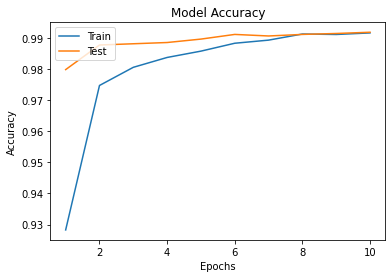

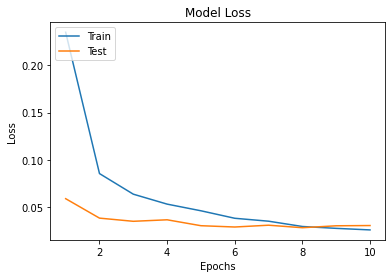

In [23]:
epochs_range = range(1,11)
plt.plot(epochs_range,history.history['accuracy'])
plt.plot(epochs_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(epochs_range,history.history['loss'])
plt.plot(epochs_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0303 - accuracy: 0.9918


[0.030328577384352684, 0.9918000102043152]